In [60]:
import numpy as np
from matplotlib import pyplot as plt
import sys
sys.path.append("../")
from Plotting.generate_database import ResultsDatabaseGenerator
from Plotting.Plot import BasicPlot, MultiPlot
import pandas as pd
ex_path = "WINE_Hybrid_Noisy_Experiment3"

In [61]:
dbGen = ResultsDatabaseGenerator()
dbGen.initialize_from_folder(ex_path)
data = dbGen.data


In [62]:
config = data[1]['config']
config.pop('__doc__', None)
print(config.keys())
print(data[1]['metrics'])
df = pd.DataFrame(index=data.keys(), columns=config.keys())
df['avg_acc'] = np.nan
df['acc_err'] = np.nan
df['avg_loss'] = np.nan
df['loss_err'] = np.nan
df

dict_keys(['PWB', 'network_type', 'num_qumodes', 'sigma'])
{'epoch': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99], 'val_accuracy': [0.5708333253860474, 0.6083333492279053, 0.6625000238418579, 0.5708333253860474, 0.5874999761581421, 0.5708333253860474, 0.5874999761581421, 0.637499988079071, 0.5791666507720947, 0.6166666746139526, 0.5958333611488342, 0.5625, 0.5916666388511658, 0.5833333134651184, 0.6208333373069763, 0.5666666626930237, 0.5791666507720947, 0.5583333373069763, 0.5333333611488342, 0.6000000238418579, 0.612500011920929, 0.5541666746139526, 0.612500011920929, 0.5666666626930237, 0.5708333253860474, 0.612500011920929, 0.5708333253860474

,PWB,network_type,num_qumodes,sigma,avg_acc,acc_err,avg_loss,loss_err
49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
181,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
242,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
129,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


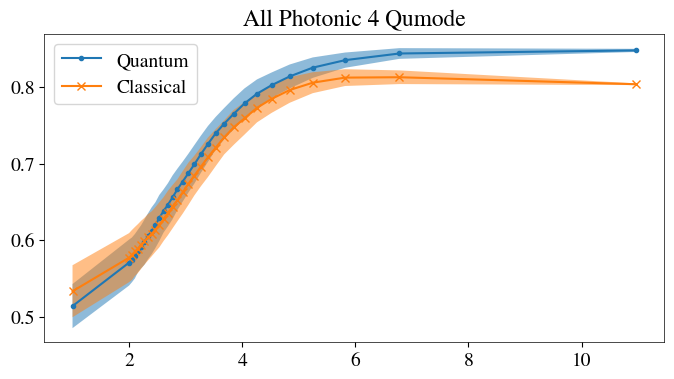

In [71]:
%matplotlib inline

for i in range(1, len(data) + 1):
    config = data[i]['config']
    config.pop('__doc__', None)
    metrics = data[i]['metrics']
    metrics.pop('epoch',None)
    acc, loss = metrics.values()
    avg_acc = np.mean(acc)
    acc_err = np.std(acc)
    avg_loss = np.mean(loss)
    loss_err = np.std(loss)
    df.loc[i] = [*config.values(), avg_acc, acc_err, avg_loss, loss_err]

df = df.sort_values('sigma')

x = np.array(df['sigma'].unique()).astype(float)
x = np.log2(2/x)

mask = (df['PWB']==1) & (df['network_type']=='quantum') & (df['num_qumodes']==4)

acc_q = df[mask]['avg_acc']
acc_err_q = df[mask]['acc_err']
loss_q = df[mask]['avg_loss']
loss_err_q = df[mask]['loss_err']

mask = (df['PWB']==1) & (df['network_type']=='classical') & (df['num_qumodes']==4)

acc_c = df[mask]['avg_acc']
acc_err_c = df[mask]['acc_err']
loss_c = df[mask]['avg_loss']
loss_err_c = df[mask]['loss_err']

fig = plt.figure(
        figsize= (
                8,4))

plt.plot(x,acc_q, marker='.', label='Quantum')
plt.fill_between(x,acc_q-acc_err_q, acc_q+acc_err_q, alpha=0.5)

plt.plot(x,acc_c,marker='x', label='Classical')
plt.fill_between(x,acc_c-acc_err_c, acc_c+acc_err_c, alpha=0.5)

plt.legend()
plt.title("All Photonic 4 Qumode")

plt.show()

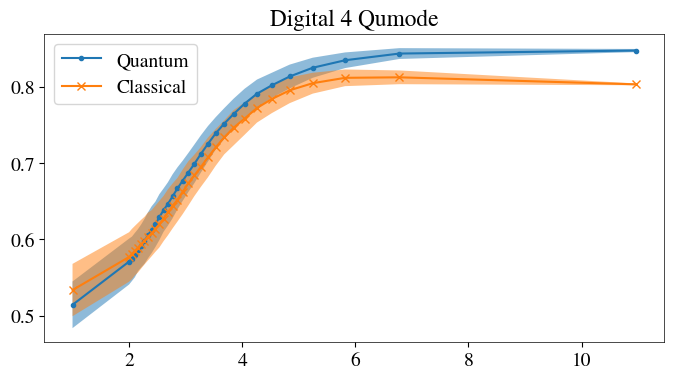

In [72]:
mask = (df['PWB']==0) & (df['network_type']=='quantum') & (df['num_qumodes']==4)

acc_q = df[mask]['avg_acc']
acc_err_q = df[mask]['acc_err']
loss_q = df[mask]['avg_loss']
loss_err_q = df[mask]['loss_err']

mask = (df['PWB']==0) & (df['network_type']=='classical') & (df['num_qumodes']==4)

acc_c = df[mask]['avg_acc']
acc_err_c = df[mask]['acc_err']
loss_c = df[mask]['avg_loss']
loss_err_c = df[mask]['loss_err']

fig = plt.figure(
        figsize= (
                8,4))

plt.plot(x,acc_q, marker='.', label='Quantum')
plt.fill_between(x,acc_q-acc_err_q, acc_q+acc_err_q, alpha=0.5)

plt.plot(x,acc_c,marker='x', label='Classical')
plt.fill_between(x,acc_c-acc_err_c, acc_c+acc_err_c, alpha=0.5)

plt.legend()
plt.title("Digital 4 Qumode")

plt.show()

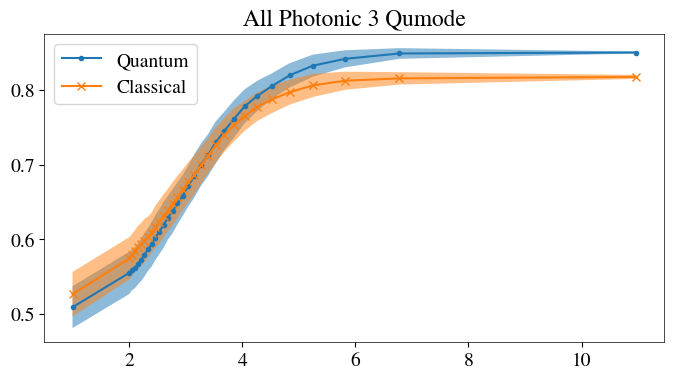

In [73]:
mask = (df['PWB']==1) & (df['network_type']=='quantum') & (df['num_qumodes']==3)

acc_q = df[mask]['avg_acc']
acc_err_q = df[mask]['acc_err']
loss_q = df[mask]['avg_loss']
loss_err_q = df[mask]['loss_err']

mask = (df['PWB']==1) & (df['network_type']=='classical') & (df['num_qumodes']==3)

acc_c = df[mask]['avg_acc']
acc_err_c = df[mask]['acc_err']
loss_c = df[mask]['avg_loss']
loss_err_c = df[mask]['loss_err']

fig = plt.figure(
        figsize= (
                8,4))

plt.plot(x,acc_q, marker='.', label='Quantum')
plt.fill_between(x,acc_q-acc_err_q, acc_q+acc_err_q, alpha=0.5)

plt.plot(x,acc_c,marker='x', label='Classical')
plt.fill_between(x,acc_c-acc_err_c, acc_c+acc_err_c, alpha=0.5)

plt.legend()
plt.title("All Photonic 3 Qumode")

plt.show()

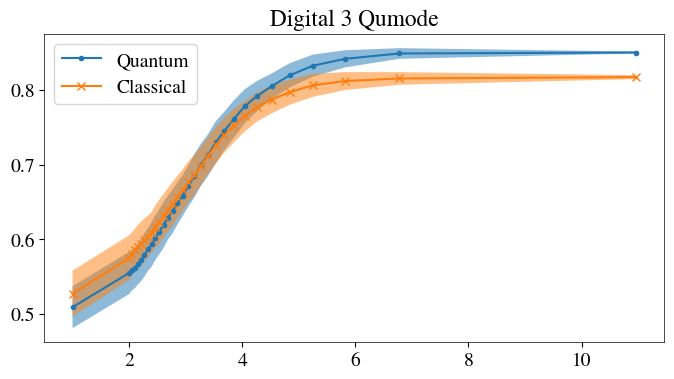

In [74]:
mask = (df['PWB']==1) & (df['network_type']=='quantum') & (df['num_qumodes']==3)

acc_q = df[mask]['avg_acc']
acc_err_q = df[mask]['acc_err']
loss_q = df[mask]['avg_loss']
loss_err_q = df[mask]['loss_err']

mask = (df['PWB']==0) & (df['network_type']=='classical') & (df['num_qumodes']==3)

acc_c = df[mask]['avg_acc']
acc_err_c = df[mask]['acc_err']
loss_c = df[mask]['avg_loss']
loss_err_c = df[mask]['loss_err']

fig = plt.figure(
        figsize= (
                8,4))

plt.plot(x,acc_q, marker='.', label='Quantum')
plt.fill_between(x,acc_q-acc_err_q, acc_q+acc_err_q, alpha=0.5)

plt.plot(x,acc_c,marker='x', label='Classical')
plt.fill_between(x,acc_c-acc_err_c, acc_c+acc_err_c, alpha=0.5)

plt.legend()
plt.title("Digital 3 Qumode")

plt.show()